In [60]:
# to generate plots that shows fitting with ANN
# is clearly a function of the quantity of training data
# and the number of epochs

# data for fitting by the ANN is generated using a configurable multivariate
# linear model

# the code can also be changed easily to look at two alternative model
# architectures, and of course, the number of neurons in the dense layer can
# be modulated

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from math import ceil, floor

# Number of samples
num_samples = 200

# Generate predictable random values for features
np.random.seed(0)
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the multivariate linear model
# some constants for data generation
c0 = 10
c1 = 1.2
c2 = 2.4
c3 = 3.9
# the equation the get the label aka y
label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
# a text label from data generation
model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})

# Column to sort by, the label index
column_index = 3
print("\nSorted\n")
# Sort the array based on the specified column
data = data.sort_values(by='label')
# have a look at the generated data
print(data)


Sorted

     feature1  feature2  feature3      label
43   0.060225  0.132068  0.046007  10.568663
171  0.054338  0.327720  0.036034  10.992266
14   0.071036  0.020651  0.221161  10.997333
107  0.572252  0.053427  0.048690  11.004820
145  0.703889  0.076956  0.016872  11.095161
..        ...       ...       ...        ...
144  0.806194  0.799796  0.962770  16.641747
51   0.438602  0.940432  0.992011  16.652202
195  0.490459  0.958983  0.997962  16.782162
177  0.928081  0.959167  0.886305  16.872286
21   0.799159  0.872651  0.990345  16.915697

[200 rows x 4 columns]


In [62]:
# pull the data frame apart
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

# print some data points from X and y
# remember syntax of slicing is different to perl
print_n = 5
print("Showing " + str(print_n) + " data points")
print("X:\n")
print(X[:print_n])
print("")
print("X.shape[1] = " + str(X.shape[1]))
print("")
print("y:\n")
print(y[:print_n])

Showing 5 data points
X:

[[0.06022547 0.13206811 0.04600731]
 [0.05433799 0.3277204  0.03603382]
 [0.07103606 0.020651   0.22116092]
 [0.57225191 0.05342718 0.0486903 ]
 [0.70388858 0.07695645 0.01687167]]

X.shape[1] = 3

y:

[10.56866253 10.99226644 10.99733324 11.00481968 11.0951613 ]


In [63]:

# Create a list to store the plot data (axes)
series = []
titles = []

for epochs in (1, 5, 50, 100):
#for epochs in (1, 5, 25, 50, 100, 200, 400):
  print("epochs " + str(epochs))
  print("")
  # model_type = "2 Layer ANN"
  model_type = "3 Layer ANN"

  if (model_type == "2 Layer ANN"):
    model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    # Create and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
  else:
    model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae', optimizer='adam')

  # Train the model
  history = model.fit(X, y, epochs=epochs, verbose=0)

  print("Training loss begin:", history.history['loss'][0])
  print("Training loss   end:", history.history['loss'][-1])
  print("")

  # Make predictions
  pred = model.predict(X, verbose = 0)

  # lets see some actual values and predictions
  print("y:\n")
  # y is also (data['label'].values)
  p_n = 5
  print(y[:p_n])
  print("")
  print("predictions:\n")
  predictions = pred[:,0]
  print(predictions[:p_n])


  max_value = ceil(max(max(y),max(predictions)))
  min_value = floor(min(min(y),min(predictions)))
  #print("Max ", max_value)
  #print("Min ", min_value)
  ilist = list(range(min_value, max_value + 1))
  #print(ilist)

  # Define the series to be added to each plot
  one_plot_data = [(y, predictions, 'Data points'), (ilist, ilist, 'Identity')]
  series.append(one_plot_data)
  titles.append(model_desc)



  # Adding titles and labels
  #plt.title(model_desc + ", \ndata_generation " + model_as_text,  fontsize=8)
  #plt.xlabel('y')
  #plt.ylabel('predictions')
  #plt.legend()

  # Store the plot
  #plt.grid(True)
  #print("")
  #print("Adding plot to plots, epoch" + str(epochs))
  #plots.append(plt)
  #print("-----------------------------------------------------------")

epochs 1

Training loss begin: 12.32010269165039
Training loss   end: 12.32010269165039

y:

[10.56866253 10.99226644 10.99733324 11.00481968 11.0951613 ]

predictions:

[0.1965178  0.2829397  0.44331467 0.98880213 1.1919214 ]
epochs 5

Training loss begin: 13.055161476135254
Training loss   end: 12.774580955505371

y:

[10.56866253 10.99226644 10.99733324 11.00481968 11.0951613 ]

predictions:

[0.28511143 0.44419533 0.31563187 0.29692695 0.27553093]
epochs 50

Training loss begin: 13.413909912109375
Training loss   end: 3.2493066787719727

y:

[10.56866253 10.99226644 10.99733324 11.00481968 11.0951613 ]

predictions:

[5.3811693 6.168943  5.427389  8.053502  8.843976 ]
epochs 100

Training loss begin: 13.487191200256348
Training loss   end: 1.1498826742172241

y:

[10.56866253 10.99226644 10.99733324 11.00481968 11.0951613 ]

predictions:

[7.000148 8.067155 7.389065 8.759705 9.262084]


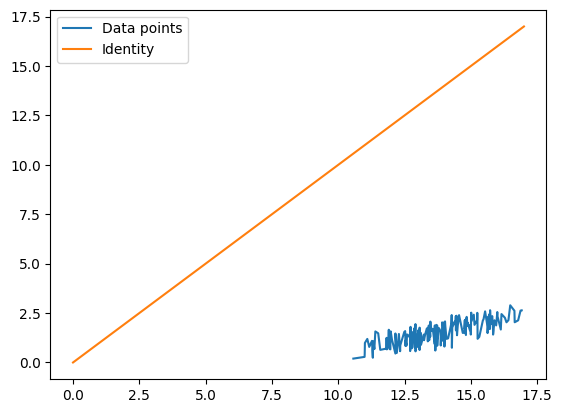

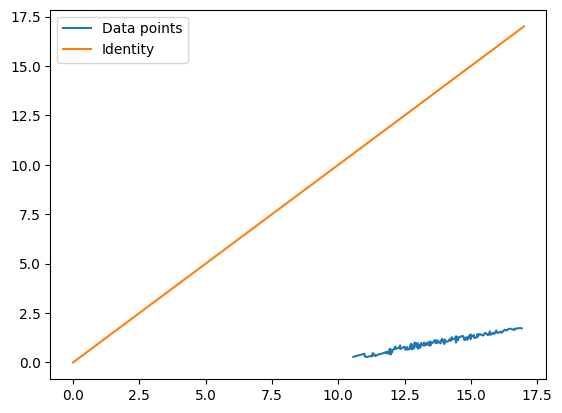

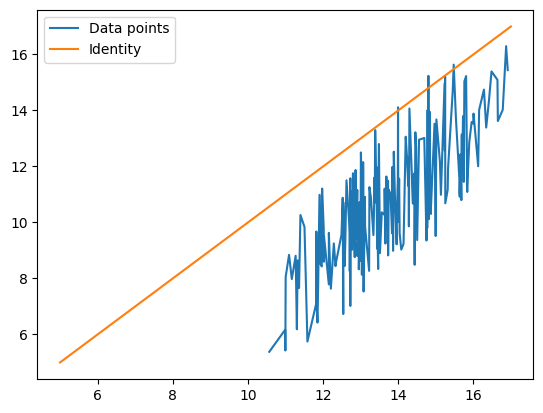

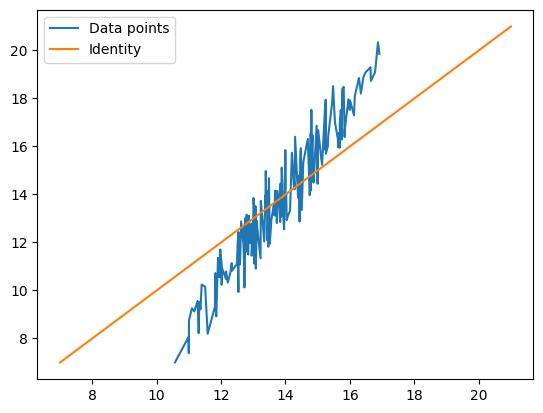

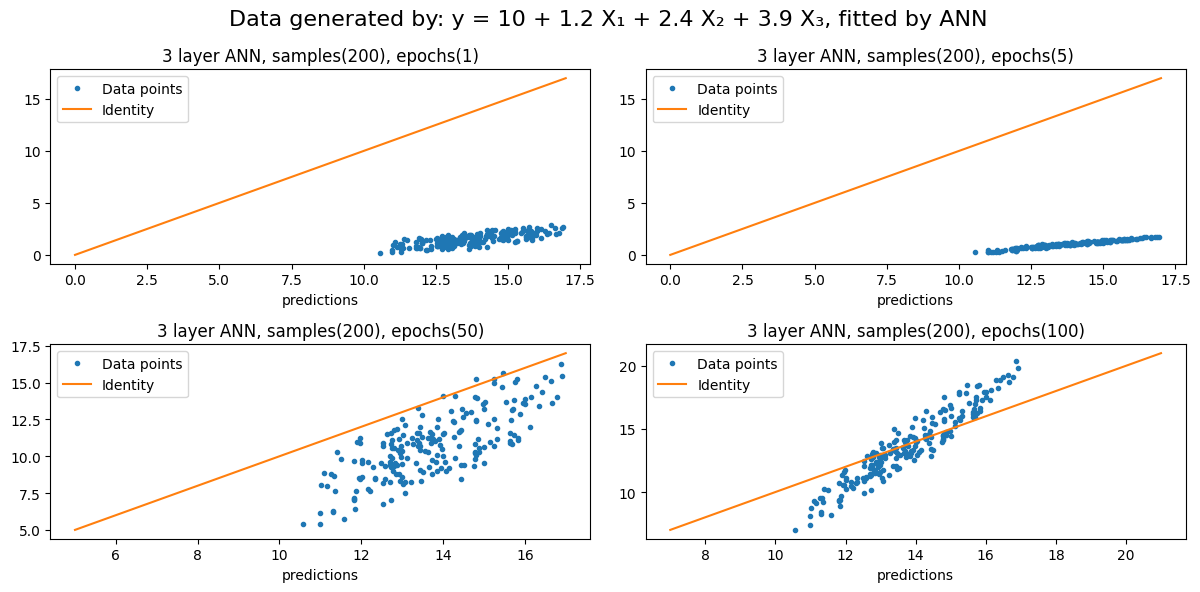

In [66]:
# Define the number of plots
# Number of rows and columns for the grid
n_rows = 2
n_cols = 2
num_plots = n_cols * n_rows

# Create a list to store the plot data (figure and axes)
plot_data = []

# Create plots in a loop
for series_set in series:
    fig, ax = plt.subplots()
    for x_data, y_data, label in series_set:
        ax.plot(x_data, y_data, label=label)
    ax.legend()
    plot_data.append((fig, ax))


# Create a new figure for the grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))

fig.suptitle('Data generated by: ' + model_as_text + ', fitted by ANN', fontsize=16)

# Flatten the axs array if necessary (in case of a single row or column)
if n_rows == 1 and n_cols == 1:
    axs = np.array([[axs]])

axs = axs.flatten()

# Loop over the plot_data array and plot in the grid
for i, (fig, ax) in enumerate(plot_data):
    for line in ax.get_lines():
        if (line.get_label() == 'Identity'):
          style = '-'
        else:
          style = '.'
        axs[i].plot(line.get_xdata(), line.get_ydata(), style, label=line.get_label())
    axs[i].legend()
    axs[i].set_xlabel('y')
    axs[i].set_xlabel('predictions')
    axs[i].set_title(titles[i])


# Adjust layout
plt.tight_layout()

# Display the grid of plots
#plt.show()
fig.show()

The model architecture


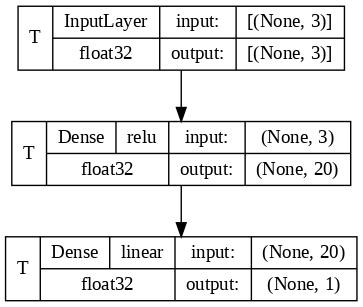

In [65]:


# Generate a plot of the model architecture
print("The model architecture")
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True)

